In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import pickle
import cv2
import os
from tensorflow.keras.applications import vgg16


from sklearn.model_selection import KFold

In [40]:
datapath="C:/Users/20112/Desktop/keras-video-classification/keras-video-classification/data"
outputlabelbinarizer="C:/Users/20112/Desktop/keras-video-classification/keras-video-classification/model/videoclassificationbinarizer"
outputmodel="C:/Users/20112/Desktop/keras-video-classification/keras-video-classification/output/videoclassificationmodel"
epoch=25
num_folds=5
# initialize the set of labels from the spots activity dataset we are
# going to train our network on
LABELS = set(["iron_pillar", "qutub_minar","alai_darwaza"])

In [3]:
print("[INFO] loading images...")
imagePaths = list(paths.list_images(datapath))
data = []
labels = []

[INFO] loading images...


In [4]:
for imagePath in imagePaths:
	# extract the class label from the filename
	label = imagePath.split(os.path.sep)[-2]
	# if the label of the current image is not part of of the labels
	# are interested in, then ignore the image
	if label not in LABELS:
		continue

	# load the image, convert it to RGB channel ordering, and resize
	# it to be a fixed 224x224 pixels, ignoring aspect ratio
	image = cv2.imread(imagePath)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = cv2.resize(image, (224, 224))

	# update the data and labels lists, respectively
	data.append(image)
	labels.append(label)


In [5]:
data = np.array(data)
labels = np.array(labels)


In [6]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)


In [7]:
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.25, stratify=labels, random_state=42)
print(testY)


[[1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 

In [8]:
# initialize the training data augmentation object
trainAug = ImageDataGenerator(
	rotation_range=30,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

# initialize the validation/testing data augmentation object (which
# we'll be adding mean subtraction to)
valAug = ImageDataGenerator()
mean = np.array([123.68, 116.779, 103.939], dtype="float32")
trainAug.mean = mean
valAug.mean = mean

In [9]:
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []
# Define the K-fold Cross Validator

In [41]:
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(data, labels):
# construct the head of the model that will be placed on top of the
    baseModel = vgg16.VGG16(weights="imagenet", include_top=False,
        input_tensor=Input(shape=(224, 224, 3)))
    # the base model
    headModel = baseModel.output
    headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
    headModel = Flatten(name="flatten")(headModel)
    headModel = Dense(512, activation="relu")(headModel)
    headModel = Dropout(0.5)(headModel)
    headModel = Dense(len(lb.classes_), activation="softmax")(headModel)

# place the head FC model on top of the base model (this will become
# the actual model we will train)
    model = Model(inputs=baseModel.input, outputs=headModel)
    fold_no=1
    for layer in baseModel.layers:
	    layer.trainable = False
    print("[INFO] compiling model...")
    opt = SGD(lr=1e-4, momentum=0.9, decay=1e-4 / epoch)
    model.compile(loss="categorical_crossentropy", optimizer=opt,
    metrics=["accuracy"])
    print("[INFO] training head...")
    H = model.fit(
    x=trainAug.flow(data[train], labels[train], batch_size=32),
    steps_per_epoch=len(train) // 32,
    validation_data=valAug.flow(testX, testY),
    validation_steps=len(test) // 32,
    epochs=epoch)
    # Generate a print
  
    print(f'Training for fold {fold_no} ...')
    scores = model.evaluate(data[test], labels[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]};          {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    fold_no = fold_no + 1
    print("[INFO] evaluating network...")
    predictions = model.predict(x=testX.astype("float32"), batch_size=32)
    print(classification_report(
	testY.argmax(axis=1),predictions.argmax(axis=1), target_names=lb.classes_, digits = 6))


l_loss: 0.6806 - val_accuracy: 0.6562
Epoch 4/25
21/21 [==============================] - 69s 3s/step - loss: 0.8345 - accuracy: 0.6192 - val_loss: 0.6361 - val_accuracy: 0.6938
Epoch 5/25
21/21 [==============================] - 73s 3s/step - loss: 0.7501 - accuracy: 0.6762 - val_loss: 0.5884 - val_accuracy: 0.7312
Epoch 6/25
21/21 [==============================] - 66s 3s/step - loss: 0.7005 - accuracy: 0.7091 - val_loss: 0.5171 - val_accuracy: 0.7937
Epoch 7/25
21/21 [==============================] - 65s 3s/step - loss: 0.6787 - accuracy: 0.7068 - val_loss: 0.5629 - val_accuracy: 0.7688
Epoch 8/25
21/21 [==============================] - 70s 3s/step - loss: 0.6331 - accuracy: 0.7511 - val_loss: 0.4648 - val_accuracy: 0.8125
Epoch 9/25
21/21 [==============================] - 70s 3s/step - loss: 0.6385 - accuracy: 0.7481 - val_loss: 0.4794 - val_accuracy: 0.7875
Epoch 10/25
21/21 [==============================] - 67s 3s/step - loss: 0.5951 - accuracy: 0.7661 - val_loss: 0.4925 - va

In [ ]:
print("[INFO] training head...")
H = model.fit(
	x=trainAug.flow(trainX, trainY, batch_size=32),
	steps_per_epoch=len(trainX) // 32,
	validation_data=valAug.flow(testX, testY),
	validation_steps=len(testX) // 32,
	epochs=epoch)

In [ ]:
for layer in baseModel.layers:
	layer.trainable = False

# compile our model (this needs to be done after our setting our
# layers to being non-trainable)
print("[INFO] compiling model...")
opt = SGD(lr=1e-4, momentum=0.9, decay=1e-4 / epoch)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

In [16]:
print(classification_report(
	testY.argmax(axis=1),predictions.argmax(axis=1), target_names=lb.classes_, digits = 6))
print(testY.argmax(axis=1))

              precision    recall  f1-score   support

alai_darwaza   0.852941  0.935484  0.892308        31
 iron_pillar   0.909091  0.833333  0.869565        96
 qutub_minar   0.865979  0.913043  0.888889        92

    accuracy                       0.881279       219
   macro avg   0.876004  0.893954  0.883587       219
weighted avg   0.883032  0.881279  0.880902       219

[0 1 1 0 1 1 2 1 2 1 0 0 1 1 0 2 2 2 1 1 2 2 1 0 1 2 2 2 1 1 2 2 1 2 2 2 1
 2 0 1 2 2 1 2 2 0 2 1 1 1 2 1 2 1 1 2 1 0 2 0 0 1 1 1 1 1 1 0 2 0 1 2 2 1
 2 1 2 2 2 1 1 1 0 1 1 0 2 2 0 0 2 1 2 2 0 0 0 2 2 1 1 0 1 2 1 1 1 0 2 0 2
 1 1 1 2 1 1 2 1 1 0 2 2 2 2 2 1 2 1 2 1 1 2 1 2 1 1 2 2 2 1 2 2 1 1 2 2 2
 1 1 2 1 0 1 1 0 2 1 2 1 2 2 1 2 2 2 1 0 1 2 0 1 1 2 2 0 1 2 2 1 2 2 1 2 1
 1 2 2 1 1 1 2 2 2 2 1 2 1 0 1 2 1 2 1 1 2 1 1 1 2 2 2 1 1 2 1 2 0 1]


In [15]:

print(confusion_matrix(predictions.argmax(axis=1), testY.argmax(axis=1), labels=lb.classes_))


NameError: name 'confusion_matrix' is not defined

In [34]:
from collections import Counter
Counter(testY.argmax(axis=1))
Counter(predictions.argmax(axis=1))

Counter({0: 90, 1: 98})

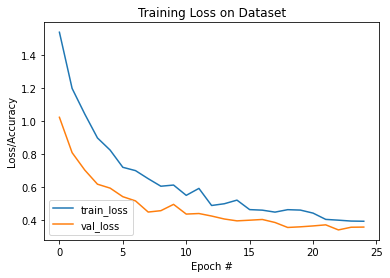

In [19]:
plt.figure()
plt.plot( H.history["loss"], label="train_loss")
plt.plot( H.history["val_loss"], label="val_loss")
plt.title("Training Loss on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()  

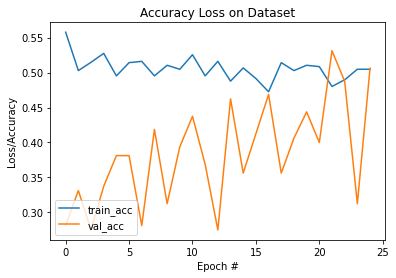

In [17]:
plt.figure()
plt.plot( H.history["accuracy"], label="train_acc")
plt.plot( H.history["val_accuracy"], label="val_acc")
plt.title("Accuracy Loss on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

plt.show()
